# Intro to Artificial Neural Networks with Keras

In Artificial Intelligence we get inspiration from nature. And it is in nature that sparked the idea of a artificual neural network. This is a way to mimic biological neurons in code. 

ANNs are at the core of Deep learning, they are versatile, poewrful and scalable, making them ideal to tackle large adn hihgly complex Machine Learning tasks. 

ANNs were first created in a paper in 1943 and it thought to be the next wave of AI. However it died down but now with some much data available and a ton of cheap computing power we are able to take advantage of this framework. 

The way to think of a artificial neuron, is that has 1 or more binary inputs and one binary output. The inputs are on and off switches. 

<img src='images/anns_logical_computation.png'/> </img>

* The first network on the left is the identiy function: if neuron A is activated, then neuron C gets activated as well but if neuron A is off then neuron C is off as well. 

* The second network performs a logical AND neuron C gets activated if either neuron A or neuron B is activated

* The third network performs a logical OR neuron C gets activated if either neuron A or neuron B is activated or both

* Finally, if we suppose that an input connection can inhibit the neurons's activity (which is the case with biological neurons), then the fourth networks computes a slighty more complex logical propsition: Neuron C is activated  only if Nueron A is actiave and neuron B is off. If neuron A isactivate all the time then you get a logical NOT neuron C is active when neuron B is off and vice versa. 

# Perceptron

This is one of the simplest ANN architectures, it is based on a neuron called the Threshold logic unit. The input and outputs are numbers instead of binary on and off switches. Each input connection is associated with a weight. The TLU computes a weighted sum of its input then applies a step funciton to that sum and outputs the results.

<img src="images/tlu.png"/></img>

The most common function is the Heaviside step function. It is a function who values are 0 for negative arguements and 1 for positive arguements. More on teh function on this link: https://en.wikipedia.org/wiki/Heaviside_step_function

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. 

A perceptron is simply composed of a single layer of TLUs with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer, the layer is called *fully connected layer* or a *dense layer*. The Inputs of the Perceptron are fed to a special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. An extra bias feature is generally added. It is typically represented using a special type of neuron called a bias neuron, which ooutputs 1 all teh time. A perceptron with two inputs and three outputs is represented in Figure10-5. This perceptron cal classify instances simultaneously into three different binary classes which makes it a multioutput classifer. 

<img src="images/figure_10_5.png"></img>

How does a preceptron train?

Well it comes down to the connection between Neurons the stronger the connection the better. A preceptron is fed one training instances at a time and for each instances it makes its predictions. For every output neuron that produced a wrong preddiction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. 

So a neuron that made the right connection produced the neuron that has the connect connection. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
assert tf.__version__ >= "2.0"

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [9]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

In [10]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [11]:
y_pred = per_clf.predict([[2,0.5]])

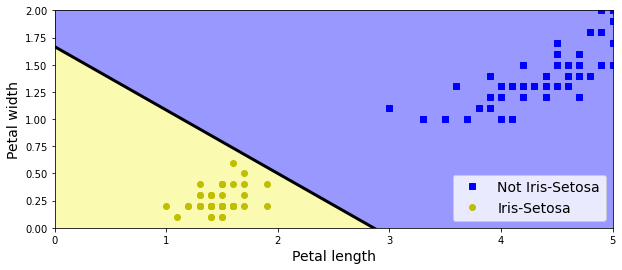

In [12]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

THe decision boundary for each output neuron should be linear, since Perceptrons are incapable of leanring complex patterns. So the dataset should be linearly separable. THis is called the Perceptron convergence theorem. 

The above shows strong similarities with Stochastic Gradient Descent but they do not have a probability output just a hard threshold. 

Preceptrons sometimes have problems solving trival issue but one way to solve this is with a Multilayer Perceptron or MLP. 

## Multilayer Perceptron and Backpropagation

An MLP is composed of one input layer, one or more layers of TLUs called hidden layers and one final layer of TLUs called the output layers. 

Layers except the output layer includes a bias neuron and is fully connected to the next layer. 

<img src="images/mlp_backprop.png"/> </img>

We have two input layers represented by the circles and then one hidden layer with 4 neurosn repesented by the middle layer and then three output neurosn represented by the top layer. The signals at the top flow in 1 direction also called a Feedforward Neural Network or FNN. 

When an ANN contains a deep stack of hidden layers, it is called a deep neural network. Traditionally it was difficult to train a DNN but in 1986 David Rumelhart, Geoffrey Hinton and Ronald Williams published a paperthat introduced back propagation. 

What backpropagation is when Gradient Descent is used to find a efficient technique for computing gradients automatically but passing through the networks in a forward direction and a backward direction. The algorithmn is able to compute teh gradient of the networks error with regard to every singel model parameter. I tcan find out how each connection weight and each gias term shoudl be tweaked in order to reduce the error. Once it has the gradients it just peforma a regular graident descent step and the whole process is repeated until the network converges to the solution. 

*autodiff* automatically computing gradients is what automatic differentiation is.

There are different autodiff techniques each with their own pros and cons. Backpropagation is called reverse-mode autodiff. It is fast and precise and well suited when the function to differentiate has many variables. 

How the backprop algorithmn works:

* It handles one mini batch at a time and it goes through the full training set multiple times. Each pass is called a epoch

* Each mini batch is passed to the network's input layer, which sends it to the first hidden layer. The algorithm then computes the output of all neurons in this layer. The result is passed on to the next layer, its output computed and passed to the next layer, and so on until we get the output of the last layer/output layer. This is a forward pass it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass. 

* Next, the algorithm measures the networks's output error( it uses a loss function that compares the desire doutput and the actual output of the network and returns some measure of the error.)

* Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule which makes this step fast and precise. 

* The algorithm then measures how much of these errors contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network. 

* Finally, the algorthm performs a Gradient Descent step to tweak all connection weights in the network, using error gradients it just computed. 

It is important to initialize all hidden layers connections randomly or training will fail. The reason for this is because if you set all weights and bias to zero then all neurons in a given layer will be identical and backpropagation will effect all neurons the same way. It will basically act as if it has 1 neuron per layer even if it was a 100 layer NN. 

Backpropagation uses two activation functions this is because activation functions give it a gradient to work with. 

You need to use activation functions because if you chain linear transformations all you get is linear tranformations. Activations help NN learn complex patterns by adding non-linearity. See this article for more info:https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron.



In [17]:
#Activation functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

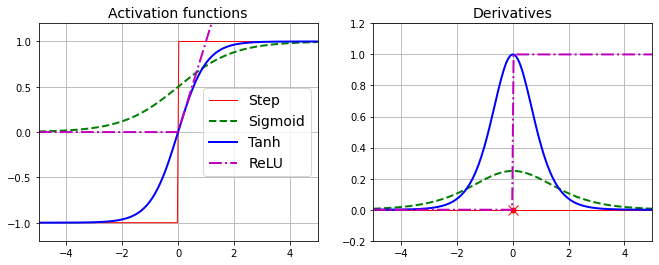

In [18]:

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

Above we see different activation functions let discuss two:

1.) TanH or hyperbolic tangent function: This function is S shaped continous and differential but is output value ranges from -1 to 1. Intstead of 0 to 1. The range tends to make each layer's output more or less centered around 0 at the beginning of traiing which often helps speed up convergence. 

2.) Relu or Recitified Linear Unit Function: It is continous but not differential at z =0 and it's derivattive is 0 for z < 0. IN practice, however it works very well and has the advantage of being ast to compute so it has become the default. Most importantly, the fact that it does not have a maximum output value helps reduce some issues during Gradient Descent. 

## Regression MLPs

If you want to predict a single value then you just need a single output neruon. Its output is the predicted value. For multivariate regression to predict multiple values at once you need 1 output neuron per dimension. 

You do not want to use any activation function when doing MLP for regression. You want to guarantee that the output will be positive. Then you can use the Relu function. in the output layer. There are other approaches like using the softplus activation function which is a smooth variant of Relu. You can guarantee that the predictions will fall within a given range of values, then you can use logistic function or hyperbolic tangent then scale the lables to the appropriate range 0 to 1 for logistic function and -1 to 1 for the hyperbolic tangent. 

Genrally the loss function is the mean squared error but if you have lot of outliers in the training set you may prefer to use the mean absolute error instead. 

*Typical Regerssion MLP Architecture*

Hyperparameters ----- Typical Value
#input neurons  ----- One per input feature (28x28 = 784 for MNSIT)

#hidden layers  ----- Depends on the problem but typically 1 to 5

#neurons per hidden layer ----Depends on the problem but typically 10 to 100

#output neurons ------ 1 per prediction dimension

Hidden activation ------ ReLU

Output activation ------ None, RELU/softplus

Loss function ------ MSE or MAE/Huber if(outliers)

## Classification MLPs

MLPs can be used for classification tasks. One doing a classification binary output you need just 1 output neuron because the output will be 0 or 1. You can also estimate the probability of the positive class. 

MLPs can also easily handled multilabel binary classification tasks this just nmeans you need 1 output neuron per each class. 

<table>
  <tr>
    <th>Hyperparameter</th>
    <th>Binary Classification</th>
    <th>Multilabel binary classification</th>
    <th>Multilabel classification</th>
  </tr>
  <tr>
    <td>Input and Hidden Layers</td>
    <td>Same as regression</td>
    <td>Same as regression</td>
    <td>Same as regressions</td>
  </tr>
  <tr>
    <td># output neurons</td>
    <td>1</td>
    <td>1 per label</td>
    <td>1 per class</td>
  </tr>
  <tr>
    <td>Output layer activation</td>
    <td>Logistic</td>
    <td>Logistic</td>
    <td>Softmax</td>
  </tr>
  <tr>
    <td>Loss function</td>
    <td>Cross entropy</td>
    <td>Cross entropy</td>
    <td>Cross entropy</td>
  </tr>
</table>

## Implementing MLPs with Keras

Keras is a high level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of neural networks. More documentation is on https://keras.io/. It was developed by Francois Chollet as part of a research project and was released as an open source project in March 2015. At the time this book was published the three most popular open source deep learning libraries are

1.) Tensorflow
2.) Microsoft Cognitive Toolkit
3.) Theano

<img src="images/keras_mxnet_tensorflow.png"/></img>

Another popular option is PyTorch which is facebook's solution. 

# Building a image Classifier Using the Sequential API


In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [22]:
X_train_full.shape

(60000, 28, 28)

In [23]:
X_train_full.dtype

dtype('uint8')

In [24]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

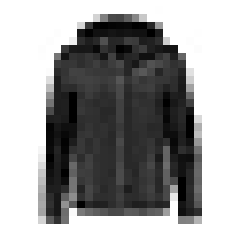

In [25]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [26]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [27]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [28]:
class_names[y_train[0]]

'Coat'

In [29]:
X_valid.shape

(5000, 28, 28)

In [30]:
X_test.shape

(10000, 28, 28)

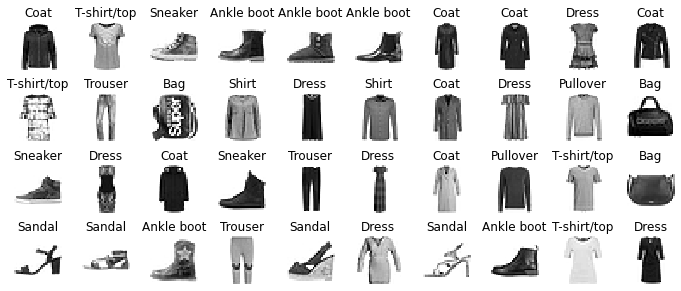

In [31]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [32]:
#Building a sequential model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

What the code above is doing is the following:

* The first line creates the sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API. 

* Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1,1). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the mode, you should specify the input_shape, which doesn't include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, as input_shape=[28,28]

* Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms(one per neuron). When it receives some input data, it computes Equation 10-2.

* Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function. 

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function. 

You can also pass a list of list of layers:



In [34]:
#First I clear the keras model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.layers

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
#You can see the model's layer using the function
model.layers

In [41]:
hidden1 = model.layers[1]
hidden1.name


'dense'

In [42]:
model.get_layer('dense') is hidden1

True

In [43]:
weights, biases = hidden1.get_weights()

In [44]:
weights.shape

(784, 300)

In [45]:
biases.shape

(300,)

After creating a model you need to compile it. This is where you can specify the loss function and the optimizer to use. 

In [46]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metric=["accuracy"])

In [47]:
#Training the model
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 149us/sample - loss: 0.7228 - val_loss: 0.5305
Epoch 2/30
55000/55000 [==============================] - 7s 135us/sample - loss: 0.4838 - val_loss: 0.4494
Epoch 3/30
55000/55000 [==============================] - 11s 203us/sample - loss: 0.4380 - val_loss: 0.4172
Epoch 4/30
55000/55000 [==============================] - 10s 181us/sample - loss: 0.4127 - val_loss: 0.3900
Epoch 5/30
55000/55000 [==============================] - 10s 177us/sample - loss: 0.3930 - val_loss: 0.3979
Epoch 6/30
55000/55000 [==============================] - 11s 196us/sample - loss: 0.3777 - val_loss: 0.3725
Epoch 7/30
55000/55000 [==============================] - 14s 249us/sample - loss: 0.3645 - val_loss: 0.3662
Epoch 8/30
55000/55000 [==============================] - 16s 287us/sample - loss: 0.3524 - val_loss: 0.3616
Epoch 9/30
55000/55000 [==============================] - 13s 235us/sample - loss

In [48]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}

In [49]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [50]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

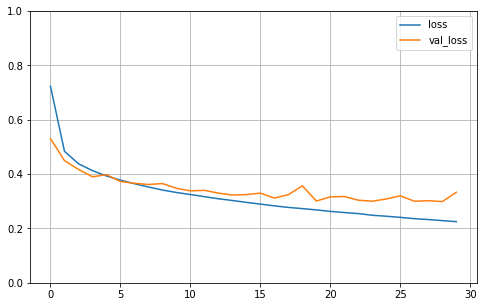

In [51]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [52]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.36831746773719787